## **AUTHORS**

1. Pauline Kariuki
2. Norman Mwapea
3. Angela Chesire
4. Carlton Ogolla
5. Emmanuel Chol

# 1.BUSINESS UNDERSTANDING

## 1.1 OVERVIEW

The United States, through USAID, has been one of Kenya’s most significant development partners — investing billions of dollars between 2010 and 2025 in critical sectors including health, education, agriculture, and economic growth. These funds have supported hospitals, schools, farmer programs, and youth empowerment initiatives that drive Kenya’s progress toward Vision 2030 and the Sustainable Development Goals (SDGs).

However, in 2025, the U.S. government paused and reviewed most foreign aid, leading to widespread disruptions across these sectors. Health programs faced staffing shortages, agricultural support initiatives were delayed, and education and youth programs stalled. This funding freeze exposed Kenya’s deep dependency on U.S. assistance and raised urgent questions about long-term sustainability and resilience.

**This project aims to quantify the scope and consequences of USAID funding cuts across all development sectors and model what Kenya’s near future could look like if cuts persist.**

## 1.2 BACKGROUND

Over the past 15 years, USAID funding has played a pivotal role in Kenya’s social and economic development. It has supported life-saving HIV programs, teacher training, farmer resilience projects, infrastructure investments, and women’s empowerment initiatives. The 2025 aid freeze disrupted thousands of projects, affecting public service delivery, employment, and economic productivity. This moment highlights the need to analyze not just the total amount of aid Kenya receives, but how that aid is distributed, how stable it has been, and which sectors and regions are most exposed to volatility.

**By using official USAID data, this project provides a data-driven view of Kenya’s aid dependency, funding volatility, and sectoral vulnerabilities — offering insights to guide policy and strategic resilience planning.**

## 1.3 KEY OBJECTIVES 

1. **Quantify Sectoral Impacts** - 
Analyze how USAID funding has changed from 2010–2025 across key sectors.

2. **Analyze Funding Patterns and Volatility** -
Use trend analysis, time-series decomposition, and regression models to examine funding fluctuations over time — identifying periods of growth, stagnation, or decline across sectors and agencies to assess the stability and predictability of U.S. aid flows to Kenya.

3. **Map Sectoral Dependencies and Correlations** -
Apply exploratory data analysis and clustering to uncover relationships between sectors and agencies — showing which sectors are most dependent on specific funding sources and how funding patterns across them move together or diverge.

4. **Forecast Future Scenarios (2026–2030)** -
Build predictive models (Random Forest, Gradient Boosting) to simulate what may happen if funding cuts persist — projecting potential trends in total and sectoral allocations.

5. **Generate Policy Insights** - 
Provide actionable, evidence-based recommendations for the Government of Kenya, donors, and partners on sustainable financing and resilience strategies.

## 1.4 SUCCESS METRICS

Success will be defined through a mix of technical, analytical, and policy outcomes:

1. **Model Accuracy:** Achieve ≥80% predictive accuracy (R² ≥ 0.8) in forecasting aid trends and sectoral outcomes under various funding scenarios.
2. **Data Quality:** Build a clean, verified, and reproducible dataset integrating USAID sectoral and agency-level funding data.
3. **Insight Clarity:** Produce analyses and visualizations that clearly demonstrate relationships between donor funding changes and sectoral outcomes.
4. **Policy Relevance:** Deliver actionable insights and recommendations for the Ministry of Planning, sectoral ministries, donors, and county governments.
5. **Scalability:** Ensure the framework is modular and reusable, allowing integration of future data from the World Bank, Kenya National Bureau of Statistics (KNBS), and the Kenya Health Data Portal.

## 1.5 KEY STAKEHOLDERS

- **National Treasury & Ministry of Planning** – For strategic budgeting, donor coordination, and fiscal policy.

- **Ministries of Health, Education, Agriculture, and Trade** – For sectoral resilience planning and impact mitigation.

- **USAID Kenya Mission & U.S. Embassy Nairobi** – For funding evaluation, policy reform, and future aid allocation.

- **County Governments** – For identifying vulnerable regions and developing localized development responses.

- **Local NGOs, Civil Society, and Development Partners** – For advocacy, partnership alignment, and program continuity.

- **Data Scientists and Researchers** – For advancing analytical models linking donor funding to development outcomes.

## 1.6 RELEVANCE TO KENYA

This project is crucial for Kenya’s economic resilience and development planning. By quantifying how fluctuations in USAID funding affect multiple sectors, it provides policymakers and development partners with an evidence base for decision-making.

The findings will:

- Help prioritize sectors and counties most vulnerable to funding shocks,

- Support domestic resource mobilization strategies,

- Strengthen policy dialogue between Kenya and its development partners, and

- Guide the design of data-driven funding frameworks that reduce dependency and build long-term sustainability.

Ultimately, this analysis empowers Kenya to plan smarter, negotiate better, and secure sustainable progress even amid donor uncertainty.



# 2. DATA UNDERSTANDING

In [135]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Counting items
from collections import Counter

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# ML
from sklearn.preprocessing import LabelEncoder, label_binarize , StandardScaler         # Encoding and scaling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import TruncatedSVD                                          # Dimensionality reduction
from sklearn.linear_model import LogisticRegression                                     # Logistic Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree                              # Decision Tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    classification_report
)

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Model interpretability
from lime import lime_tabular

# Set column display to maximum
pd.set_option('display.max_colwidth', None)

In [136]:
# Loading the data set into a data frame and preview it
df = pd.read_csv("../Raw Data/usaid_kenya.csv")
df

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,2,Obligations,2005,30SEP2005,28000,42057,8,Project-type interventions - not Investment Related,.,26757
1,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2005,30SEP2005,17875,26849,8,Project-type interventions - not Investment Related,.,26757
2,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01FEB2006,3469,5047,8,Project-type interventions - not Investment Related,.,26757
3,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01APR2006,1138,1655,8,Project-type interventions - not Investment Related,.,26757
4,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01MAY2006,394,573,8,Project-type interventions - not Investment Related,.,26757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80067,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,29,EPA,...,2,Obligations,2024,19AUG2024,64250,62579,13,Technical Cooperation - Other,614819,1121
80068,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2020,25SEP2020,1146864,1327370,13,Technical Cooperation - Other,1146864,276
80069,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2021,28SEP2021,282104,315641,13,Technical Cooperation - Other,282104,267
80070,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2024,02JAN2024,500000,486994,13,Technical Cooperation - Other,500000,235


##### *Observation:* From top to bottom, the data is uniform.

Our goal is to check how foreign aid cuts will affect Kenya from the time of this analysis - 2025, to the future. As such, we will check how recent and old our data is.

In [137]:
# Check for the shape of our data
print(f"The data has {df.shape[0]} entries and {df.shape[1]} features.")

The data has 80072 entries and 56 features.


In [138]:
# Check column names 
df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

##### *Observation:* The column names as inconsistent. They contain a mix of snake and camel case. There is need for standardization.

In [139]:
# Standardize column names so they are more intuitive
df.columns = (
    df.columns
    .str.strip()                     # remove leading/trailing spaces
    .str.lower()                     # make all lowercase
    .str.replace(' ', '_')           # replace spaces with underscores
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # remove special characters
)

df.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'managing_agency_id', 'managing_agency_acronym',
       'managing_agency_name', 'managing_subagency_or_bureau_id',
       'managing_subagency_or_bureau_acronym',
       'managing_subagency_or_bureau_name', 'implementing_partner_category_id',
       'implementing_partner_category_name',
       'implementing_partner_subcategory_id',
       'implementing_partner_subcategory_name', 'implementing_partner_id',
       'implementing_partner_name', 'international_category_id',
       'international_category_name', 'international_sector_code',
       'international_sector_name', 'international_purpose_code',
       'international_purpose_name', 'us_category_id', 'us_category_name',
       'us_sector_id', 'us_sector_name', 'funding_account_id',
       'funding_account_name', 'funding_agency_id', 'funding_agency_name',
       'funding_agency

In [140]:
# Checking for the data types and metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80072 entries, 0 to 80071
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country_id                             80072 non-null  int64  
 1   country_code                           80072 non-null  object 
 2   country_name                           80072 non-null  object 
 3   region_id                              80072 non-null  int64  
 4   region_name                            80072 non-null  object 
 5   income_group_id                        80072 non-null  float64
 6   income_group_name                      80072 non-null  object 
 7   income_group_acronym                   80072 non-null  object 
 8   managing_agency_id                     80072 non-null  int64  
 9   managing_agency_acronym                80072 non-null  object 
 10  managing_agency_name                   80072 non-null  object 
 11  ma

##### *Observations:* 
1. The data is mostly categorical.  
2. It has some notable missing values.
3. Some columns will need typecasting such as:
    - fiscal_year to integer
    - transaction_date, activity_start_date, activity_end_date to datetime
    - activity_budget_amount to float
    - current_dollar_amount, constant_dollar_amount to float
    - international_sector_code, international_purpose_code to string
    - activity_project_number to string
4. There exist a number of unique identifiers. These offer little analytical value and will thus be dropped.

In [141]:
# ------- [Type Casting] -------
# Convert columns to their correct data types for analysis

# Fiscal year -> convert from object to integer
df['fiscal_year'] = pd.to_numeric(df['fiscal_year'], errors='coerce').astype('Int64')

# Date columns -> convert to datetime format
date_cols = ['transaction_date', 'activity_start_date', 'activity_end_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Numeric conversion for budget amount
df['activity_budget_amount'] = pd.to_numeric(df['activity_budget_amount'], errors='coerce')

# Financial columns -> cast to float for consistency in modeling
df['current_dollar_amount'] = df['current_dollar_amount'].astype(float)
df['constant_dollar_amount'] = df['constant_dollar_amount'].astype(float)

In [142]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
country_id,80072.0,404.0,404.0,404.0,404.0,404.0,404.0,0.0
region_id,80072.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
income_group_id,80072.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
managing_agency_id,80072.0,2.106417,1.0,1.0,1.0,1.0,38.0,3.373374
managing_subagency_or_bureau_id,80072.0,63.601009,2.0,19.0,19.0,21.0,999.0,181.821798
implementing_partner_category_id,80072.0,4.949258,1.0,3.0,4.0,8.0,8.0,2.931494
implementing_partner_subcategory_id,80072.0,11.125662,1.0,5.0,8.0,19.0,20.0,7.817254
implementing_partner_id,80072.0,3449361.432848,1000001.0,3990008.0,4000011.0,4001154.0,4021430.0,1144963.638087
international_category_id,80072.0,5.056574,1.0,2.0,3.0,9.0,10.0,3.282771
international_sector_code,80072.0,373.995342,111.0,134.0,152.0,720.0,998.0,306.316465


In [143]:
# Checking statistical summary for categorical variables
df.describe(include='object').T

,count,unique,top,freq
country_code,80072,1,KEN,80072
country_name,80072,1,Kenya,80072
region_name,80072,1,Sub-Saharan Africa,80072
income_group_name,80072,1,Lower Middle Income Country,80072
income_group_acronym,80072,1,LMIC,80072
managing_agency_acronym,80072,20,USAID,63735
managing_agency_name,80072,20,U.S. Agency for International Development,63735
managing_subagency_or_bureau_acronym,76894,63,AFR,53601
managing_subagency_or_bureau_name,80072,67,Bureau for Africa,52879
implementing_partner_category_name,80072,8,Enterprises,34906


In [144]:
# Print unique value counts for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

country_id: 1 unique values
country_code: 1 unique values
country_name: 1 unique values
region_id: 1 unique values
region_name: 1 unique values
income_group_id: 1 unique values
income_group_name: 1 unique values
income_group_acronym: 1 unique values
managing_agency_id: 20 unique values
managing_agency_acronym: 20 unique values
managing_agency_name: 20 unique values
managing_subagency_or_bureau_id: 67 unique values
managing_subagency_or_bureau_acronym: 63 unique values
managing_subagency_or_bureau_name: 67 unique values
implementing_partner_category_id: 8 unique values
implementing_partner_category_name: 8 unique values
implementing_partner_subcategory_id: 17 unique values
implementing_partner_subcategory_name: 17 unique values
implementing_partner_id: 888 unique values
implementing_partner_name: 888 unique values
international_category_id: 10 unique values
international_category_name: 10 unique values
international_sector_code: 30 unique values
international_sector_name: 30 unique valu

In [145]:
# Print the unique values themselves
for col in df.columns:
    print(f"\n{col}: {df[col].unique()}")


country_id: [404]

country_code: ['KEN']

country_name: ['Kenya']

region_id: [5]

region_name: ['Sub-Saharan Africa']

income_group_id: [2.]

income_group_name: ['Lower Middle Income Country']

income_group_acronym: ['LMIC']

managing_agency_id: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 29 38]

managing_agency_acronym: ['USAID' 'STATE' 'MCC' 'TREAS' 'AGR' 'HHS' 'DOD' 'DOI' 'DOJ' 'DOL' 'DOC'
 'DOE' 'DHS' 'DOT' 'PC' 'TDA' 'ADF' 'FTC' 'EPA' 'DFC']

managing_agency_name: ['U.S. Agency for International Development' 'Department of State'
 'Millennium Challenge Corporation' 'Department of the Treasury'
 'Department of Agriculture' 'Department of Health and Human Services'
 'Department of Defense' 'Department of the Interior'
 'Department of Justice' 'Department of Labor' 'Department of Commerce'
 'Department of Energy' 'Department of Homeland Security'
 'Department of Transportation' 'Peace Corps'
 'Trade and Development Agency' 'African Development Foundation'
 'Federal Trade

# 3. DATA PREPARATION AND EXPLORATORY DATA ANALYSIS (EDA)

Data preparation will majorly entail the following:
1. Data wrangling which will entail checking for and removing missing values and duplicates.
2. Feature engineering.
3. Exploratory Data Analysis.

Before that, however, we will check how old and recent our data is and filter to only have data from the present (2025) to 15 years in the past.

In [146]:
# Check the data recency
fiscal_min, fiscal_max = df['fiscal_year'].agg(['min', 'max'])
print(f"Data covers fiscal years from {fiscal_min} to {fiscal_max}.")

Data covers fiscal years from 1954 to 2025.


We have 71 years worth of data! We don't as much so we will first create a copy of the data to avoid modifying the original then filter to have our target data.

In [147]:
# Create a copy of the data
data = df.copy(deep=True)

# Filter the data to include only years from 2010 to 2025
data = data[(data['fiscal_year'] >= 2010) & (data['fiscal_year'] <= 2025)]

# Sanity check
fiscal_min, fiscal_max = data['fiscal_year'].agg(['min', 'max'])
print(f"Filtered data covers fiscal years from {fiscal_min} to {fiscal_max}.")

# Check filtered data shape
print(f"Filtered data has {data.shape[0]} rows and {data.shape[1]} columns.")

Filtered data covers fiscal years from 2010 to 2025.
Filtered data has 68270 rows and 56 columns.


Perfect. Now we begin the tedious work that is cleaning.

## 3.1 DATA CLEANING

### 3.1.1 HANDLING DUPLICATES

We will start by confirming the number of duplicates.

In [148]:
# Checking for duplicate values
print("Duplicate records:", data.duplicated().sum())

Duplicate records: 6


There are 6 duplicates. We will drop them and preview our changes.

In [149]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Sanity check
print("Duplicates after cleaning:", data.duplicated().sum())

# Check shape after removing duplicates
print(f"Data after removing duplicates has {data.shape[0]} rows and {data.shape[1]} columns.")

Duplicates after cleaning: 0
Data after removing duplicates has 68264 rows and 56 columns.


#### 3.1.2 HANDLING MISSING VALUES

In [150]:
# Checking for missing values
data.isna().sum()

country_id                                   0
country_code                                 0
country_name                                 0
region_id                                    0
region_name                                  0
income_group_id                              0
income_group_name                            0
income_group_acronym                         0
managing_agency_id                           0
managing_agency_acronym                      0
managing_agency_name                         0
managing_subagency_or_bureau_id              0
managing_subagency_or_bureau_acronym      2434
managing_subagency_or_bureau_name            0
implementing_partner_category_id             0
implementing_partner_category_name           0
implementing_partner_subcategory_id          0
implementing_partner_subcategory_name        0
implementing_partner_id                      0
implementing_partner_name                    0
international_category_id                    0
international

In [151]:
# Drop unique identifier columns
data = data.loc[:, ~data.columns.str.contains('id', case=False)]

# Drop columns that offer little analytical value
redundant_cols = [
    'country_code', 'region_name', 'income_group_name', 'income_group_acronym',
    'international_sector_code', 'international_purpose_code',
    'activity_project_number', 'activity_name', 'activity_description',
    'funding_account_name', 'managing_agency_acronym', 'funding_agency_acronym',
    'international_sector_name', 'international_purpose_name', 'activity_budget_amount', 
    'implementing_partner_subcategory_name', 'international_category_name',
    'activity_start_date', 'activity_end_date'
]

data.drop(columns=redundant_cols, inplace=True)

Since we already have the managing subagency or bureau name, the managing subagency or bureau acronym is redundant. We will drop this column.

In [152]:
# Drop managing_subagency_or_bureau_acronym
data.drop(columns='managing_subagency_or_bureau_acronym',inplace=True)

In [153]:
data.isna().sum()

country_name                             0
managing_agency_name                     0
managing_subagency_or_bureau_name        0
implementing_partner_category_name       0
implementing_partner_name                0
us_category_name                         0
us_sector_name                           0
funding_agency_name                      0
foreign_assistance_objective_name        0
transaction_type_name                    0
fiscal_year                              0
transaction_date                      2044
current_dollar_amount                    0
constant_dollar_amount                   0
dtype: int64

With the unnecessary columns dropped, we can now address the remaining columns that contain missing values. These columns either have too few nulls to warrant removal or are too important to discard. One such column is transaction_date, which is likely to play a critical role in time series analysis and forecasting.

To guide our imputation strategy, we will leverage the fiscal_year column to estimate and fill in the missing transaction dates. Before proceeding, it is essential to examine the distributions of the fiscal year, transaction year, and transaction month to identify any underlying patterns or relationships that may inform a more accurate and data-driven imputation approach.

In [154]:
# Work on a copy
df_ = data.copy(deep=True)

# Extract Year and Month
df_['Year'] = df_['transaction_date'].dt.year
df_['Month'] = df_['transaction_date'].dt.month

# Compute Distributions
fiscal_counts = df_['fiscal_year'].value_counts().sort_index()
yearly_counts = df_['Year'].value_counts().sort_index()
monthly_counts = df_['Month'].value_counts().sort_index()

# Print Summaries
print("=== Fiscal Year Distribution ===")
print(fiscal_counts.to_frame('Transaction Count'))
print("\n=== Transaction Year Distribution ===")
print(yearly_counts.to_frame('Transaction Count'))
print("\n=== Transaction Month Distribution ===")
print(monthly_counts.to_frame('Transaction Count'))

=== Fiscal Year Distribution ===
             Transaction Count
fiscal_year                   
2010                      3260
2011                      3640
2012                      3619
2013                      4403
2014                      4444
2015                      4064
2016                      4186
2017                      4652
2018                      4229
2019                      4006
2020                      3747
2021                      4620
2022                      5298
2023                      5736
2024                      5777
2025                      2583

=== Transaction Year Distribution ===
        Transaction Count
Year                     
2009.0                685
2010.0               3009
2011.0               3265
2012.0               3508
2013.0               4156
2014.0               4269
2015.0               3918
2016.0               4072
2017.0               4505
2018.0               4090
2019.0               3855
2020.0               3740
2021.0

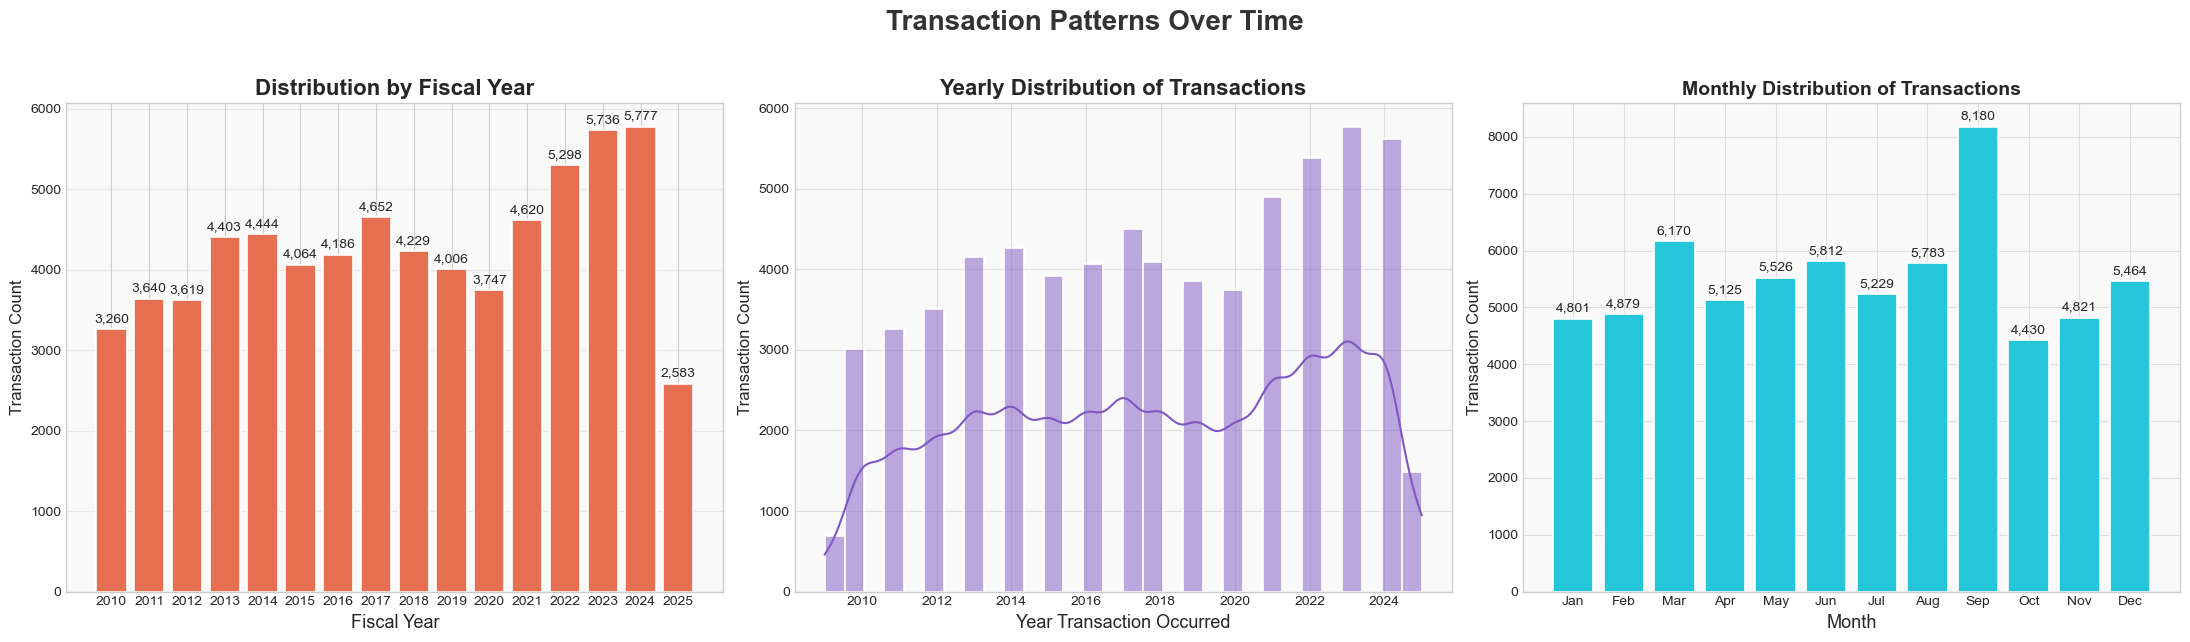

In [155]:
# Extract Year and Month
df_['Year'] = df_['transaction_date'].dt.year
df_['Month'] = df_['transaction_date'].dt.month

# Monthly counts
monthly_counts = df_['Month'].value_counts().sort_index()

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(22, 6.5))

# Fiscal Year Distribution
fiscal_counts = df_['fiscal_year'].value_counts().sort_index()
bars1 = axes[0].bar(
    fiscal_counts.index.astype(str),
    fiscal_counts.values,
    color='#E76F51',
    edgecolor='white',
    linewidth=1.2
)
axes[0].set_title('Distribution by Fiscal Year', fontsize=16, weight='semibold')
axes[0].set_xlabel('Fiscal Year', fontsize=13)
axes[0].set_ylabel('Transaction Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.4)
axes[0].set_facecolor('#f9f9f9')

# Annotate fiscal year bars
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(
        f'{int(height):,}',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center', va='bottom', fontsize=10
    )

# Yearly Distribution
sns.histplot(
    data=df_,
    x='Year',
    bins=30,
    kde=True,
    color='#7E57C2',
    ax=axes[1],
    edgecolor='white',
    linewidth=1.2
)
axes[1].set_title('Yearly Distribution of Transactions', fontsize=16, weight='semibold')
axes[1].set_xlabel('Year Transaction Occurred', fontsize=13)
axes[1].set_ylabel('Transaction Count', fontsize=12)
axes[1].grid(alpha=0.6)
axes[1].set_facecolor('#f9f9f9')

# Monthly Distribution
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_counts.index = month_names[:len(monthly_counts)]

bars2 = axes[2].bar(
    monthly_counts.index,
    monthly_counts.values,
    color='#26C6DA',
    edgecolor='white',
    linewidth=1.2
)
axes[2].set_title('Monthly Distribution of Transactions', fontsize=14, weight='semibold')
axes[2].set_xlabel('Month', fontsize=13)
axes[2].set_ylabel('Transaction Count', fontsize=12)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(alpha=0.6)
axes[2].set_facecolor('#f9f9f9')

# Annotate monthly bars
for bar in bars2:
    height = bar.get_height()
    axes[2].annotate(
        f'{int(height):,}',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center', va='bottom',
        fontsize=10
    )

# General aesthetics
plt.suptitle('Transaction Patterns Over Time', fontsize=20, weight='bold', color='#333333')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

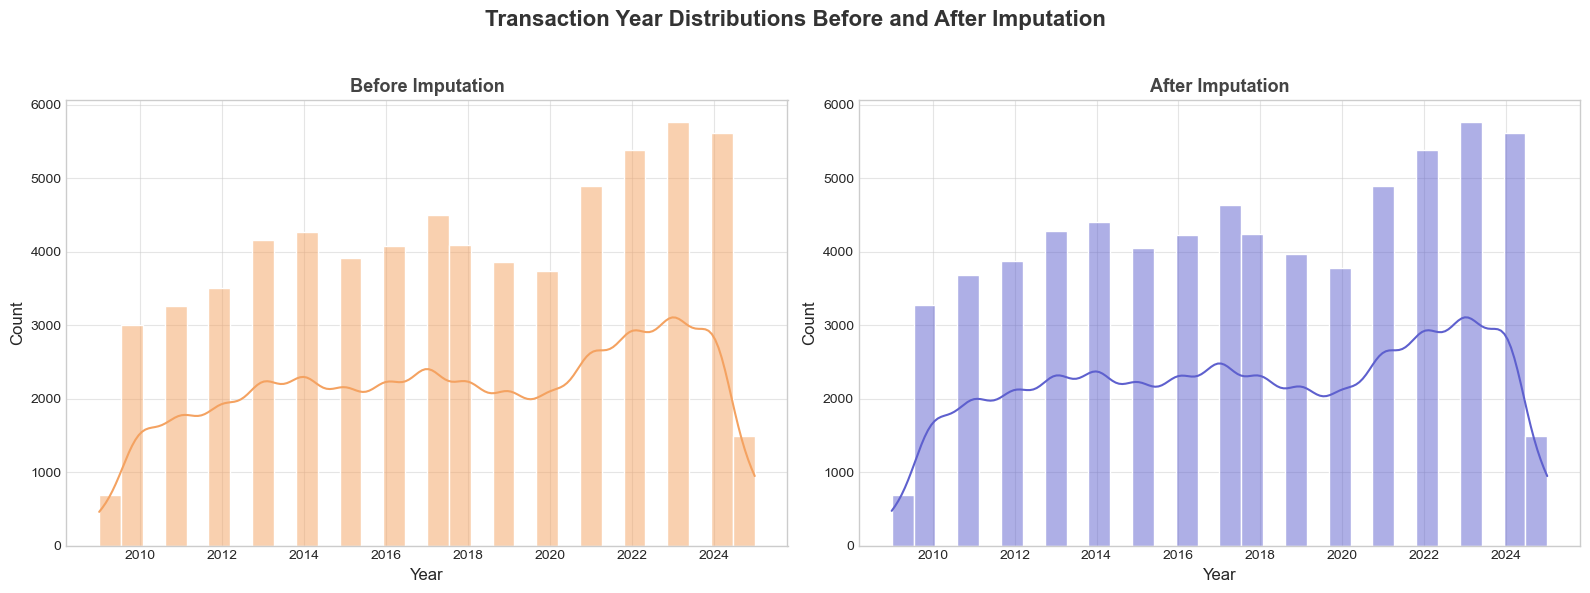

Missing count before: 0
Missing count after: 0

Median transaction year before: 2018.0
Median transaction year after: 2018.0

Mean transaction year before: 2017.76
Mean transaction year after: 2017.63

IQR before: 8.0
IQR after: 8.0


In [156]:
# ------- [Impute transaction_date] -------

'''
    We will use the fiscal year and implement forward fill. 
    Should any missing values remain, we will use the median and
    further fall back to the end date of the fiscal year because 
    most transactions tend to occur towards the end of the fiscal year, 
    as seen from the distribution plots.
'''

# Before Imputation snapshot
before = data
before_dates = before['transaction_date'].dropna()

# Impute
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')

median_dates = (
    data.groupby('fiscal_year')['transaction_date']
        .median()
        .fillna(method='ffill')
)

def impute_transaction_date(row):
    if pd.notnull(row['transaction_date']):
        return row['transaction_date']
    fy = row['fiscal_year']
    if fy in median_dates.index and pd.notnull(median_dates[fy]):
        return median_dates[fy]
    else:
        return pd.Timestamp(year=int(fy), month=9, day=30)

data['transaction_date'] = data.apply(impute_transaction_date, axis=1)

# After Imputation
after_dates = data['transaction_date']

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before Imputation
sns.histplot(before_dates.dt.year, bins=30, kde=True, color='#F4A261', edgecolor='white', ax=axes[0]) 
axes[0].set_title("Before Imputation", fontsize=13, weight='semibold', color='#444')
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].grid(alpha=0.5)

# After Imputation
sns.histplot(after_dates.dt.year, bins=30, kde=True, color='#5E60CE', edgecolor='white', ax=axes[1])  
axes[1].set_title("After Imputation", fontsize=13, weight='semibold', color='#444')
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].grid(alpha=0.5)

# Tighten it all up
plt.suptitle("Transaction Year Distributions Before and After Imputation", 
             fontsize=16, weight='semibold', color='#333')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Statistical Checks
print("Missing count before:", before['transaction_date'].isna().sum())
print("Missing count after:", data['transaction_date'].isna().sum())

print("\nMedian transaction year before:", before_dates.dt.year.median())
print("Median transaction year after:", after_dates.dt.year.median())

print("\nMean transaction year before:", before_dates.dt.year.mean().round(2))
print("Mean transaction year after:", after_dates.dt.year.mean().round(2))

print("\nIQR before:", before_dates.dt.year.quantile(0.75) - before_dates.dt.year.quantile(0.25))
print("IQR after:", after_dates.dt.year.quantile(0.75) - after_dates.dt.year.quantile(0.25))

In [157]:
# Final data check
print(f"The data now has {data.shape[0]} entries and {data.shape[1]} features.")

# Checking for missing values
print("\nMissingness Distribution:\n", data.isna().sum())

The data now has 68264 entries and 14 features.

Missingness Distribution:
 country_name                          0
managing_agency_name                  0
managing_subagency_or_bureau_name     0
implementing_partner_category_name    0
implementing_partner_name             0
us_category_name                      0
us_sector_name                        0
funding_agency_name                   0
foreign_assistance_objective_name     0
transaction_type_name                 0
fiscal_year                           0
transaction_date                      0
current_dollar_amount                 0
constant_dollar_amount                0
dtype: int64


## 3.2 FEATURE ENGINEERING

In [158]:
print("Categories:\n", data['us_category_name'].value_counts())
print("\n"+'**'*35+'\n')
print("Sectors:\n", data["us_sector_name"].value_counts())

Categories:
 us_category_name
Health                                     25840
Program Support                            21103
Economic Development                        8171
Humanitarian Assistance                     4586
Democracy, Human Rights, and Governance     2837
Peace and Security                          2389
Environment                                 1661
Education and Social Services               1380
Multi-sector                                 297
Name: count, dtype: int64

**********************************************************************

Sectors:
 us_sector_name
Direct Administrative Costs                              20983
HIV/AIDS                                                 13863
Protection, Assistance and Solutions                      4230
Agriculture                                               3961
Family Planning and Reproductive Health                   2521
Macroeconomic Foundation for Growth                       2276
Maternal and Child Health  

In [159]:
data['us_sector_name'].unique()

array(['Basic Education',
       'Pandemic Influenza and Other Emerging Threats (PIOET)',
       'Direct Administrative Costs', 'Malaria',
       'Maternal and Child Health',
       'Family Planning and Reproductive Health', 'HIV/AIDS',
       'Water Supply and Sanitation', 'Good Governance', 'Civil Society',
       'Rule of Law and Human Rights',
       'Political Competition and Consensus-Building',
       'Counter-Terrorism', 'Conflict Mitigation and Reconciliation',
       'Policies, Regulations, and Systems', 'Social Assistance',
       'Financial Sector', 'Economic Opportunity',
       'Private Sector Competitiveness', 'Trade and Investment',
       'Agriculture', 'Natural Resources and Biodiversity',
       'Clean Productive Environment', 'Monitoring and Evaluation',
       'Macroeconomic Foundation for Growth', 'Tuberculosis', 'Nutrition',
       'Higher Education', 'Disaster Readiness', 'Social Services',
       'Protection, Assistance and Solutions',
       'Other Public Heal

In [160]:
data['us_sector_name'] = data['us_sector_name'].str.strip().str.lower()
mapping1 = {
    'Health': [
        'Other Public Health Threats', 'Pandemic Influenza and Other Emerging Threats (PIOET)',
        'Malaria', 'Maternal and Child Health', 'Family Planning and Reproductive Health',
        'HIV/AIDS', 'Social Assistance' , 'Water Supply and Sanitation', 'Tuberculosis', 'Nutrition', 'Health - General'
    ],
    'Education': [
        'Basic Education', 'Higher Education', 'Education and Social Services - General'
    ],
    'Security': [
        'Counter-Terrorism', 'Conflict Mitigation and Reconciliation', 'Transnational Crime',
        'Stabilization Operations and Security Sector Reform', 'Peace and Security - General',
        'Counter-Narcotics', 'Combating Weapons of Mass Destruction (WMD)'
    ],
    'Politics': [
        'Good Governance', 'Civil Society', 'Political Competition and Consensus-Building',
        'Democracy, Human Rights, and Governance - General'
    ],
    'Human Rights': [
        'Rule of Law and Human Rights', 'Protection, Assistance and Solutions',
        'Migration Management'
    ],
    'Environment': [
        'Natural Resources and Biodiversity', 'Clean Productive Environment',
        'Environment - General', 'Environment', 'Mining and Natural Resources'
    ],
    'Agriculture': [
        'Agriculture'
    ],
    'Economy': [
        'Economic Opportunity'
    ],
    'Development': [
        'Infrastructure'
    ]
}
# This is a code that categorises every value with the category given in the map
def assign_category(text_entry):

    # Handle empty or non-string data
    if not isinstance(text_entry, str):
        return 'Other/Unspecified'

    text_lower = text_entry.lower()

    # Iterate through the main categories and their associated phrases
    for category, phrases in mapping1.items():
        for phrase in phrases:
            # Check if any phrase is present in the text entry
            if phrase.lower() in text_lower:
                return category  # Return the high-level category and stop searching

    # If no match is found after checking all categories
    return 'Other/Unspecified'

data["us_sector_name"] = data["us_sector_name"].apply(assign_category)
data["us_sector_name"].value_counts()

us_sector_name
Health               25921
Other/Unspecified    25367
Human Rights          4469
Agriculture           3961
Politics              2606
Security              2389
Environment           1673
Education             1158
Economy                479
Development            241
Name: count, dtype: int64

### 3.2.1 TEMPORAL FEATURES

From transaction date, we can extract the year, month and quater to track seasonal aid patterns. We also want to capture aid rush behavior before the fiscal year ends hence we will create a binary flag to check this in a variable called is_end_of_fiscal_year.

In [161]:
# Sort data for correct rolling
data = data.sort_values(by=['us_sector_name', 'fiscal_year'])

# Temporal Features
data['transaction_year'] = data['transaction_date'].dt.year
data['transaction_month'] = data['transaction_date'].dt.month
data['transaction_quarter'] = data['transaction_date'].dt.quarter

# End of fiscal year flag
data['is_end_of_fiscal_year'] = data['transaction_month'].isin([8, 9]).astype(int)

# Days since start of fiscal year
data['days_since_start_of_year'] = (
    pd.to_datetime(data['transaction_date']) - 
    pd.to_datetime(data['fiscal_year'].astype(str) + '-01-01')
).dt.days

# Holiday quarter flag
data['is_holiday_quarter'] = data['transaction_quarter'].isin([4]).astype(int)

# Aid volatility (year-over-year)
volatility = (
    data.groupby('fiscal_year')['constant_dollar_amount']
        .std().reset_index()
        .rename(columns={'constant_dollar_amount': 'aid_volatility'})
)
data = data.merge(volatility, on='fiscal_year', how='left')

# Rolling 3-year mean & std per sector
# Rolling mean
data['rolling_mean_3yr'] = (
    data.groupby('us_sector_name')['constant_dollar_amount']
        .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Rolling std 
data['rolling_std_3yr'] = (
    data.groupby('us_sector_name')['constant_dollar_amount']
        .transform(lambda x: x.rolling(window=3, min_periods=2).std())
)

# Fill initial NaNs with 0 to show no volatility yet
data['rolling_std_3yr'] = data['rolling_std_3yr'].fillna(0)

### 3.2.2 AGGREGATES

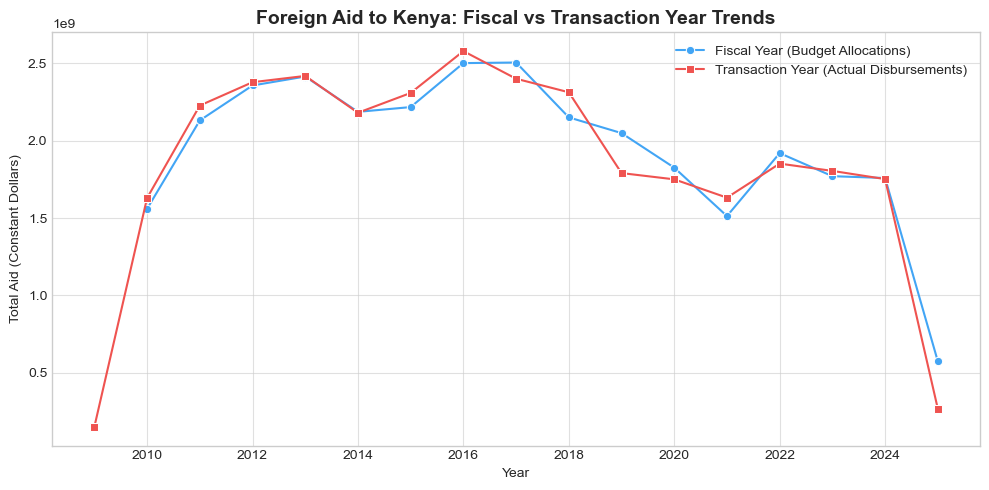

Fiscal Year Range: 2010 -> 2025
Transaction Year Range: 2009 -> 2025

Correlation between fiscal and transaction trends: 0.5347584170472992


In [162]:
# Yearly Aggregates by Fiscal Year
fiscal_agg = (
    data.groupby('fiscal_year', as_index=False)
        .agg(
            total_aid_fiscal=('constant_dollar_amount', 'sum'),
            transaction_count_fiscal=('constant_dollar_amount', 'count'),
            mean_aid_per_transaction_fiscal=('constant_dollar_amount', 'mean'),
            aid_std_fiscal=('constant_dollar_amount', 'std')
        )
)

# Yearly Aggregates by Transaction Year
data['transaction_year'] = data['transaction_date'].dt.year

transaction_agg = (
    data.groupby('transaction_year', as_index=False)
        .agg(
            total_aid_transaction=('constant_dollar_amount', 'sum'),
            transaction_count_transaction=('constant_dollar_amount', 'count'),
            mean_aid_per_transaction_transaction=('constant_dollar_amount', 'mean'),
            aid_std_transaction=('constant_dollar_amount', 'std')
        )
)

# Sectoral Aggregates by Fiscal Year
sector_agg = (
    data.groupby(['fiscal_year', 'us_sector_name'], as_index=False)
        .agg(
            total_sector_aid=('constant_dollar_amount', 'sum'),
            avg_sector_aid=('constant_dollar_amount', 'mean'),
            sector_transaction_count=('constant_dollar_amount', 'count')
        )
)

# Agency Aggregates by Fiscal Year
agency_agg = (
    data.groupby(['fiscal_year', 'managing_agency_name'], as_index=False)
        .agg(
            total_agency_aid=('constant_dollar_amount', 'sum'),
            avg_agency_aid=('constant_dollar_amount', 'mean'),
            agency_transaction_count=('constant_dollar_amount', 'count')
        )
)

# Partner Aggregates by Fiscal Year
partner_agg = (
    data.groupby(['fiscal_year', 'implementing_partner_name'], as_index=False)
        .agg(
            total_partner_aid=('constant_dollar_amount', 'sum'),
            partner_transaction_count=('constant_dollar_amount', 'count')
        )
)

# Merge Aggregates Back
data = data.merge(fiscal_agg, on='fiscal_year', how='left')
data = data.merge(sector_agg, on=['fiscal_year', 'us_sector_name'], how='left')
data = data.merge(agency_agg, on=['fiscal_year', 'managing_agency_name'], how='left')
data = data.merge(partner_agg, on=['fiscal_year', 'implementing_partner_name'], how='left')

# Compute Ratios & Yearly Change
data['sector_to_total_ratio'] = data['total_sector_aid'] / data['total_aid_fiscal']
data['agency_to_total_ratio'] = data['total_agency_aid'] / data['total_aid_fiscal']

# Year-over-year change based on fiscal aggregates
fiscal_agg['yearly_aid_change'] = fiscal_agg['total_aid_fiscal'].pct_change()

# Visualize Fiscal vs Transaction Trends
plt.figure(figsize=(10,5))
sns.lineplot(
    data=fiscal_agg, x='fiscal_year', y='total_aid_fiscal',
    label='Fiscal Year (Budget Allocations)', color='#42a5f5', marker='o'
)
sns.lineplot(
    data=transaction_agg, x='transaction_year', y='total_aid_transaction',
    label='Transaction Year (Actual Disbursements)', color='#ef5350', marker='s'
)
plt.title("Foreign Aid to Kenya: Fiscal vs Transaction Year Trends", fontsize=14, weight='semibold')
plt.xlabel("Year")
plt.ylabel("Total Aid (Constant Dollars)")
plt.legend()
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

# Sanity Checks
print("Fiscal Year Range:", fiscal_agg['fiscal_year'].min(), "->", fiscal_agg['fiscal_year'].max())
print("Transaction Year Range:", transaction_agg['transaction_year'].min(), "->", transaction_agg['transaction_year'].max())
print("\nCorrelation between fiscal and transaction trends:",
      fiscal_agg['total_aid_fiscal'].corr(transaction_agg['total_aid_transaction']))

### 3.2.3 TRANSACTION LEAD AND LAG

To get the time gap (in days) between consecutive transactions for a given partner, agency, or sector. Will be useful for modeling continuity or irregular funding patterns.

In [163]:
# Transaction lag
data = data.sort_values(by=['implementing_partner_name', 'transaction_date'])
data['transaction_lag'] = (
    data.groupby('implementing_partner_name')['transaction_date']
        .diff().dt.days
)

# Transaction lead
data['transaction_lead'] = (
    data.groupby('implementing_partner_name')['transaction_date']
        .diff(-1).abs().dt.days
)

# Impute missing lag and lead values
# Partner-specific medians
data['transaction_lag'] = data.groupby('implementing_partner_name')['transaction_lag'] \
                              .transform(lambda x: x.fillna(x.median()))
data['transaction_lead'] = data.groupby('implementing_partner_name')['transaction_lead'] \
                               .transform(lambda x: x.fillna(x.median()))

# Global median fallback
global_lag_median = data['transaction_lag'].median()
global_lead_median = data['transaction_lead'].median()

data['transaction_lag'] = data['transaction_lag'].fillna(global_lag_median)
data['transaction_lead'] = data['transaction_lead'].fillna(global_lead_median)

### 3.2.4 SECTOR, AGENCY AND PARTNER GROWTH RATES

We then compute year-over-year growth rates in aid disbursements for each:
- Sector (us_sector_name)
- Agency (managing_agency_name)
- Partner (implementing_partner_name)

We do this by:
1. Aggregates total aid per fiscal year within each group.  
2. Calculates the **percentage change** (pct_change) from the previous year.  
3. Merges these rates back into the main dataset as:
   - sector_growth_rate
   - agency_growth_rate
   - partner_growth_rate

These features capture how funding levels evolve over time across key entities.

In [164]:
# Compute Growth per Fiscal Year within Each Group
for group_col, new_col in [
    ('us_sector_name', 'sector_growth_rate'),
    ('managing_agency_name', 'agency_growth_rate'),
    ('implementing_partner_name', 'partner_growth_rate')
]:
    # Aggregate total aid per fiscal year within each group
    growth_df = (
        data.groupby([group_col, 'fiscal_year'], as_index=False)
            .agg(total_aid_group=('constant_dollar_amount', 'sum'))
    )

    # Compute year-over-year growth rate
    growth_df[new_col] = growth_df.groupby(group_col)['total_aid_group'].pct_change()

    # Drop the helper column to prevent merge conflicts
    growth_df.drop(columns=['total_aid_group'], inplace=True)

    # Merge growth rates safely without creating _x / _y columns
    data = data.merge(growth_df, on=['fiscal_year', group_col], how='left', validate='m:1')

    # Fill introduced nulls with 0 indicating no growth data available
    data[new_col].fillna(0, inplace=True)

### 3.2.5 AID DIVERSITY AND CONCENTRATION ACROSS AGENCIES AND PARTNERS

In [165]:
# Number of agencies contributing per fiscal year
agency_count = (
    data.groupby('fiscal_year')['managing_agency_name']
        .nunique().reset_index().rename(columns={
            'managing_agency_name':'agency_count_fiscal'})
)
data = data.merge(agency_count, on='fiscal_year', how='left')

# Aid concentration index -> Herfindahl-Hirschman Index
hh_index = (
    data.groupby('fiscal_year')['constant_dollar_amount']
        .apply(lambda x: ((x / x.sum()) ** 2).sum())
        .reset_index().rename(columns={
            'constant_dollar_amount':'aid_concentration_index'})
)
data = data.merge(hh_index, on='fiscal_year', how='left')

### 3.2.6 DEPENDENCY AND CHANGE SENSITIVITY

In [166]:
top3_share = (
    data.groupby(['fiscal_year', 'managing_agency_name'])['constant_dollar_amount']
        .sum().groupby('fiscal_year')
        .apply(lambda x: x.nlargest(3).sum() / x.sum())
        .reset_index(name='top3_agency_share')  # <- directly name the new column
)

data = data.merge(top3_share, on='fiscal_year', how='left')

### 3.2.7 AID CONCENTRATION METRICS

Then we computed the number of unique implementing partners per fiscal year and the average aid managed per partner.  
- partner_count_fiscal: total distinct partners involved in implementing aid projects each fiscal year.  
- aid_per_partner: average volume of aid managed per partner, indicating how implementation responsibilities are distributed.

In [167]:
aid_partner_count = (
    data.groupby('fiscal_year', as_index=False)
        .implementing_partner_name.nunique()
        .rename(columns={'implementing_partner_name': 'partner_count_fiscal'})
)
data = data.merge(aid_partner_count, on='fiscal_year', how='left')

data['aid_per_partner'] = data['total_aid_fiscal'] / data['partner_count_fiscal']

### 3.2.8 DOMINANT SECTOR PER AGENCY BASED ON FUNDING SHARE

Then we identified the primary sector each managing agency focuses on, based on total funding allocation.  
- Agencies are ranked by the total constant dollar amount disbursed across sectors.  
- The top-ranked sector (highest funding share) is tagged as the agency’s *dominant sector*, providing insight into each agency’s main area of engagement in Kenya.

In [168]:
# Dominant sector per agency (based on funding share)
agency_sector = (
    data.groupby(['managing_agency_name', 'us_sector_name'], as_index=False)
        .constant_dollar_amount.sum()
)
agency_sector['rank'] = (
    agency_sector.groupby('managing_agency_name')['constant_dollar_amount']
        .rank(method='dense', ascending=False)
)
dominant_sector = agency_sector.loc[agency_sector['rank'] == 1, 
                                    ['managing_agency_name', 'us_sector_name']]
dominant_sector.rename(columns={'us_sector_name': 'dominant_sector_per_agency'}, inplace=True)
data = data.merge(dominant_sector, on='managing_agency_name', how='left')  

### 3.2.9 AID DIVERSITY INDEX

Next, we compute an **Aid Diversity Index** using Shannon entropy to measure how evenly aid is distributed across sectors each fiscal year.  
- A higher index value indicates that funding is more evenly spread across multiple sectors (greater diversity).  
- A lower value suggests aid is concentrated in fewer sectors, showing less diversification of support.

In [169]:
def shannon_entropy(x):
    p = x / x.sum()
    return -(p * np.log2(p)).sum()

entropy_df = (
    data.groupby(['fiscal_year', 'us_sector_name'], as_index=False)
        .constant_dollar_amount.sum()
)
entropy_df = (
    entropy_df.groupby('fiscal_year')['constant_dollar_amount']
        .apply(shannon_entropy)
        .reset_index()
        .rename(columns={'constant_dollar_amount': 'aid_diversity_index'})
)
data = data.merge(entropy_df, on='fiscal_year', how='left')

### 3.2.10 CROSS FEATURE INTERRACTIONS

Then we capture **relationships between key entities** by combining categorical identifiers:  
- agency_sector_interaction links each managing agency to its respective sector, helping model how agency–sector pairings influence aid flows.  
- partner_agency_interaction links implementing partners to managing agencies, capturing potential collaboration or funding patterns.

In [170]:
data['agency_sector_interaction'] = (
    data['managing_agency_name'].astype(str) + '_' + data['us_sector_name'].astype(str)
)
data['partner_agency_interaction'] = (
    data['implementing_partner_name'].astype(str) + '_' + data['managing_agency_name'].astype(str)
)

### 3.2.11 NORMALIZED AND RELATIVE RATIOS 

These features measure how each transaction compares to overall fiscal trends:  
- aid_per_transaction_ratio shows how large a transaction is relative to the **average aid per transaction** that fiscal year.  
- relative_aid_share represents the **proportion of total yearly aid** contributed by each transaction, indicating its relative financial weight.

In [171]:
data['aid_per_transaction_ratio'] = (
    data['constant_dollar_amount'] / data['mean_aid_per_transaction_fiscal']
)
data['relative_aid_share'] = (
    data['constant_dollar_amount'] / data['total_aid_fiscal']
)

### 3.2.12 TRANSACTION SIZE

We convert the current dollar amount into categorical data which will be simpler to use during modelling.

In [172]:
data['transaction_size'] = pd.qcut(
    data['current_dollar_amount'].rank(method='first'),
    q=3, labels=['Low', 'Medium', 'High']
)

### 3.2.13 COLUMN RENAMING

#### Foreign Assistance Objective

Some column names like foreign_assistance_objective_name are too long and will be tedious to write in code. As such, we will rename them into shorter, more intuitive names.

In [173]:
# Get unique values to understand what the column is about
print("Unique values in foreign_assistance_objective_name:", data['foreign_assistance_objective_name'].unique())

Unique values in foreign_assistance_objective_name: ['Economic' 'Military']


It talks about the objective of the funding agency. We rename it to 'objective'.

In [174]:
# Renaming the column
data = data.rename(columns={'foreign_assistance_objective_name': 'objective'})

#### Funding–Management Relationship

From the initial data uniqueness chack, funding agency name and managing agency seem to have the same information. We will shed more light on this to see how similar they actually are.

In [175]:
print('Unique values in funding_agency_name:', data['funding_agency_name'].nunique())
print('Unique values in managing_agency_name:', data['managing_agency_name'].nunique())

# Check the unique values themselves
print("\n"+'--'*50+'\n')
print("Unique values in funding_agency_name:\n", data['funding_agency_name'].unique())
print("\n"+'--'*50+'\n')
print("Unique values in managing_agency_name:\n", data['managing_agency_name'].unique())

Unique values in funding_agency_name: 21
Unique values in managing_agency_name: 20

----------------------------------------------------------------------------------------------------

Unique values in funding_agency_name:
 ['African Development Foundation' 'Department of State'
 'Department of Agriculture' 'U.S. Agency for International Development'
 'Trade and Development Agency' 'Millennium Challenge Corporation'
 'Department of the Interior' 'Department of Health and Human Services'
 'Department of Energy' 'Department of the Treasury' 'Department of Labor'
 'U.S. International Development Finance Corporation'
 'Environmental Protection Agency' 'Department of Commerce'
 'Department of Defense' 'Department of Homeland Security'
 'Department of the Army' 'Department of Justice'
 'Department of Transportation' 'Federal Trade Commission' 'Peace Corps']

----------------------------------------------------------------------------------------------------

Unique values in managing_agency

Check correlation between what agency funds and which one manages a project.

In [176]:
cross_tab = pd.crosstab(data['funding_agency_name'], data['managing_agency_name'])
cross_tab.head()

managing_agency_name,African Development Foundation,Department of Agriculture,Department of Commerce,Department of Defense,Department of Energy,Department of Health and Human Services,Department of Homeland Security,Department of Justice,Department of Labor,Department of State,Department of Transportation,Department of the Interior,Department of the Treasury,Environmental Protection Agency,Federal Trade Commission,Millennium Challenge Corporation,Peace Corps,Trade and Development Agency,U.S. Agency for International Development,U.S. International Development Finance Corporation
funding_agency_name,,,,,,,,,,,,,,,,,,,,
African Development Foundation,1761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Department of Agriculture,0,398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,717,0
Department of Commerce,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Department of Defense,0,0,0,229,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Department of Energy,0,0,0,0,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


To capture the relationship between the source and executor of U.S. foreign aid, a composite feature funded_and_managed_by was created.  
This field concatenates each funding_agency_name with its corresponding managing_agency_name, providing a clear mapping of how financial resources flow from funders to implementing agencies.  
This feature will help analyze inter-agency dependencies and assess how funding cuts from specific sources may impact Kenya’s on-ground aid programs.

In [177]:
data['funded_and_managed_by']=(data['funding_agency_name'].astype(str).fillna('')+ \
                                  ' managed by ' + data['managing_agency_name'].astype(str).fillna('')
                                  )

# Drop original columns to avoid redundancy and multicollinearity
data.drop(columns=['funding_agency_name', 'managing_agency_name'], inplace=True)

#### Partner Combination

We begin by checking how related they are by checking how unique the columns are from each other

In [178]:
print('Unique values in implementing_partner_name:', data['implementing_partner_name'].nunique())
print('Unique values in implementing_partner_category_name:', data['implementing_partner_category_name'].nunique())

# Check the unique values themselves
print("\n"+'--'*50+'\n')
print("Unique values in implementing_partner_name:\n", data['implementing_partner_name'].unique())
print("\n"+'--'*50+'\n')
print("Unique values in implementing_partner_category_name:\n", data['implementing_partner_category_name'].unique())

Unique values in implementing_partner_name: 833
Unique values in implementing_partner_category_name: 8

----------------------------------------------------------------------------------------------------

Unique values in implementing_partner_name:
 ['4 Digits Consulting' '5 Stones intelligence Inc.'
 'A.P. Moller - Maersk Group' 'AAR Corp' 'ACF International' 'AGS Group'
 'AJGB International, Inc.' 'APA Insurance Group' 'ARD, Inc.' 'AT&T Inc.'
 'ATSG LLC' 'AVSI Foundation' 'Abt Associates, Inc.'
 'Academy for Educational Development' 'Ace Africa Kenya'
 'Achelis Kenya Limited' 'Achukule Agro-Forestry Tree Nursery'
 'Act Change Transform' 'Adam Smith International' 'Adili Solar Hubs Ltd'
 'Adventist Development and Relief Agency International'
 'Africa Fruits & Veggie' 'Africa One Health University Network'
 'African Agricultural Technology Foundation' 'African American Institute'
 'African Conservation Centre' 'African Development Solutions'
 'African Field Epidemiology Network'
 'Af

To simplify analysis and reduce redundancy, the columns implementing_partner_name and implementing_partner_category_name were merged into a single feature named partner_category_interaction.  
This captures both the implementing partner and their associated category in one variable, enabling more meaningful aggregations and comparisons during EDA.  

After verifying that all combinations were retained correctly, the original columns were dropped to maintain a clean and efficient dataset.

In [179]:
data['partner_category_interaction'] = (
    data['implementing_partner_name'].astype(str) + '_' +
    data['implementing_partner_category_name'].astype(str)
)

# Drop original columns to avoid redundancy and multicollinearity
data.drop(columns=[
    'implementing_partner_name', 'implementing_partner_category_name'
], inplace=True)

In [180]:
# Sanity check after feature engineering
print(f"Resultant dataset after feature engineering contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Missingness check
print("\nMissingness Distribution After Feature Engineering:\n", data.isna().sum())

Resultant dataset after feature engineering contains 68264 rows and 52 columns.

Missingness Distribution After Feature Engineering:
 country_name                         0
managing_subagency_or_bureau_name    0
us_category_name                     0
us_sector_name                       0
objective                            0
transaction_type_name                0
fiscal_year                          0
transaction_date                     0
current_dollar_amount                0
constant_dollar_amount               0
transaction_year                     0
transaction_month                    0
transaction_quarter                  0
is_end_of_fiscal_year                0
days_since_start_of_year             0
is_holiday_quarter                   0
aid_volatility                       0
rolling_mean_3yr                     0
rolling_std_3yr                      0
total_aid_fiscal                     0
transaction_count_fiscal             0
mean_aid_per_transaction_fiscal      0
aid_std_

In [181]:
# Save dataset for modeling
data.to_csv('clean_data.csv', index=False)

## 3.3 EXPLORATORY DATA ANALYSIS (EDA)